## 30 Seconds

In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)

trainD = np.load("/home/hsiehch/30s/2D_spect/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/2D_spect/validate_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/2D_spect/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], trainD.shape[2], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], validationD.shape[2], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], testD.shape[2], 1))
testLabel = np_utils.to_categorical(testL, 4)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 65, 139, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 65, 139, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 65, 139, 1)
Test Label:  (3041, 4)


In [2]:
model = Sequential() 
model.add(Conv2D(filters = 32, kernel_size = 3, data_format="channels_last", input_shape = (trainData.shape[1], trainData.shape[2], 1), activation = "relu"))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(160, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 137, 32)       320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 135, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 67, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 65, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 63, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 63, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 31, 64)        0         
__________

In [3]:
# parallel_model = multi_gpu_model(model, gpus=8)
model.compile(optimizer ='Adam', loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 80
# graph = TensorBoard()
train_history_1 = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=150,
                          validation_data=(validationData, validationLabel),
                          batch_size=batch_s*1, 
                          verbose=1)

print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

Train on 5078 samples, validate on 2032 samples
Epoch 1/150
5078/5078 [==============================] - 7s 1ms/step - loss: 1.0788 - acc: 0.5353 - val_loss: 1.1304 - val_acc: 0.5866
Epoch 2/150
5078/5078 [==============================] - 4s 694us/step - loss: 1.0119 - acc: 0.5853 - val_loss: 1.1082 - val_acc: 0.5866
Epoch 3/150
5078/5078 [==============================] - 3s 655us/step - loss: 1.0057 - acc: 0.5868 - val_loss: 1.0714 - val_acc: 0.5866
Epoch 4/150
5078/5078 [==============================] - 3s 643us/step - loss: 1.0017 - acc: 0.5872 - val_loss: 1.0515 - val_acc: 0.5876
Epoch 5/150
5078/5078 [==============================] - 3s 655us/step - loss: 0.9882 - acc: 0.5874 - val_loss: 1.0682 - val_acc: 0.5925
Epoch 6/150
5078/5078 [==============================] - 3s 666us/step - loss: 0.9853 - acc: 0.5857 - val_loss: 0.9864 - val_acc: 0.5896
Epoch 7/150
5078/5078 [==============================] - 3s 636us/step - loss: 0.9765 - acc: 0.5890 - val_loss: 0.9986 - val_acc: 0.

5078/5078 [==============================] - 3s 639us/step - loss: 0.3871 - acc: 0.8592 - val_loss: 0.6031 - val_acc: 0.7648
Epoch 120/150
5078/5078 [==============================] - 3s 637us/step - loss: 0.3890 - acc: 0.8570 - val_loss: 0.6080 - val_acc: 0.7736
Epoch 121/150
5078/5078 [==============================] - 3s 672us/step - loss: 0.3801 - acc: 0.8562 - val_loss: 0.6247 - val_acc: 0.7608
Epoch 122/150
5078/5078 [==============================] - 3s 649us/step - loss: 0.3760 - acc: 0.8623 - val_loss: 0.6184 - val_acc: 0.7795
Epoch 123/150
5078/5078 [==============================] - 3s 634us/step - loss: 0.3765 - acc: 0.8580 - val_loss: 0.6350 - val_acc: 0.7736
Epoch 124/150
5078/5078 [==============================] - 3s 634us/step - loss: 0.3778 - acc: 0.8610 - val_loss: 0.6010 - val_acc: 0.7805
Epoch 125/150
5078/5078 [==============================] - 3s 641us/step - loss: 0.3774 - acc: 0.8627 - val_loss: 0.6501 - val_acc: 0.7687
Epoch 126/150
5078/5078 [================

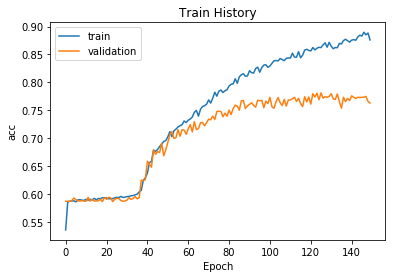

In [4]:
show_plot('acc', train_history_1)

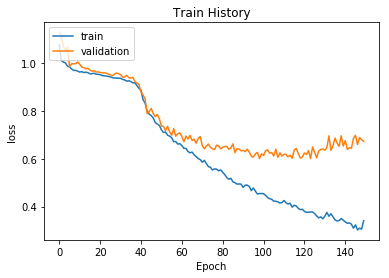

In [5]:
show_plot('loss', train_history_1)